#Graph Mining

## Kyle Schryver

In [1]:
import networkx as nx

import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
import numpy as np
import csv

In [2]:
file = open('movie-actor.txt', encoding="utf8")
content = file.readlines()

movieGraph = nx.Graph()

weight_list = {}

actorMovieDic = {}

for r in content:
    cleanRow = r.strip('\n').split('/')
    movie = cleanRow[0]
    for i in range(1,len(cleanRow)):
        if cleanRow[i] in actorMovieDic.keys():
            actorMovieDic[cleanRow[i]].append(movie)
        else:
            actorMovieDic[cleanRow[i]] = []
            actorMovieDic[cleanRow[i]].append(movie)
    
for row in content:
    cleanRow = row.strip('\n').split('/')
    for i in range(1,len(cleanRow)):
        for j in range(1,len(cleanRow)):
            if i<j:
                if movieGraph.has_edge(cleanRow[i],cleanRow[j])==False:
                    movieGraph.add_edge(cleanRow[i],cleanRow[j], weight=1)
                else:
                    movieGraph[cleanRow[i]][cleanRow[j]]['weight'] = movieGraph[cleanRow[i]][cleanRow[j]]['weight']+1

In [3]:
actorSize = {}

for i in actorMovieDic:
        actorSize[i] = len(actorMovieDic[i])
    

In [4]:
print(movieGraph.number_of_edges())

1453761


In [5]:
movieGraph.number_of_nodes()

21143

In [6]:
minor = [(u, v) for (u, v, d) in movieGraph.edges(data=True) if d["weight"] < 5]
        
movieGraph.remove_edges_from(minor)

In [7]:
print(movieGraph.number_of_edges())

147


In [8]:
movieGraph.number_of_nodes()

21143

In [9]:
# remove nodes/actors with degree = 0 (no connections left with other actors)
minor_actors = []

for n in movieGraph.nodes:
    if movieGraph.degree(n) <= 2:
        minor_actors.append(n)

movieGraph.remove_nodes_from(minor_actors)

In [10]:
movieGraph.number_of_nodes()

35

In [11]:
actorSize_small = {}

for i in actorSize:
    if movieGraph.has_node(i):
        actorSize_small[i] = actorSize[i]

In [12]:
actorSize_small

{'Welker, Frank': 48,
 'Nelson, Jerry (I)': 8,
 'Oz, Frank': 9,
 'Whitmire, Steve': 7,
 'Goelz, Dave': 7,
 'Proctor, Phil': 14,
 'Cummings, Jim (I)': 23,
 'Pinney, Patrick': 10,
 'Angel, Jack (I)': 15,
 'Derryberry, Debi': 14,
 'Lynn, Sherry (I)': 14,
 'Darling, Jennifer': 12,
 'McGowan, Mickie': 13,
 'Ratzenberger, John': 7,
 'Farmer, Bill (I)': 15,
 'Wayne, John (I)': 14,
 'Roberson, Chuck': 7,
 'Bumpass, Rodger': 9,
 'Bergen, Bob': 12,
 'Ranft, Joe': 6,
 'Rabson, Jan': 6,
 'Nakajima, Haruo': 12,
 'Kelly, Gene (I)': 7,
 'Tajima, Yoshifumi': 8,
 'Sahara, Kenji': 10,
 'Ootani, Ikue': 7,
 'Suzuki, Kazuo (I)': 7,
 'Cabot, Sebastian (I)': 7,
 'Stuart, Eric (III)': 5,
 'Gates, Ken (I)': 5,
 'Blaustein, Madeleine': 5,
 'Lillis, Rachael': 5,
 'Taylor, Veronica (I)': 5,
 'Rogers, Kayzie': 5,
 'Jayne, Tara': 5}

In [13]:
sizes = list(actorSize_small.values())

In [14]:
print(sizes)

[48, 8, 9, 7, 7, 14, 23, 10, 15, 14, 14, 12, 13, 7, 15, 14, 7, 9, 12, 6, 6, 12, 7, 8, 10, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5]


In [15]:
scaled_sizes = []
for i in sizes:
    scaled_sizes.append(i * 200)

In [16]:
print(scaled_sizes)

[9600, 1600, 1800, 1400, 1400, 2800, 4600, 2000, 3000, 2800, 2800, 2400, 2600, 1400, 3000, 2800, 1400, 1800, 2400, 1200, 1200, 2400, 1400, 1600, 2000, 1400, 1400, 1400, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


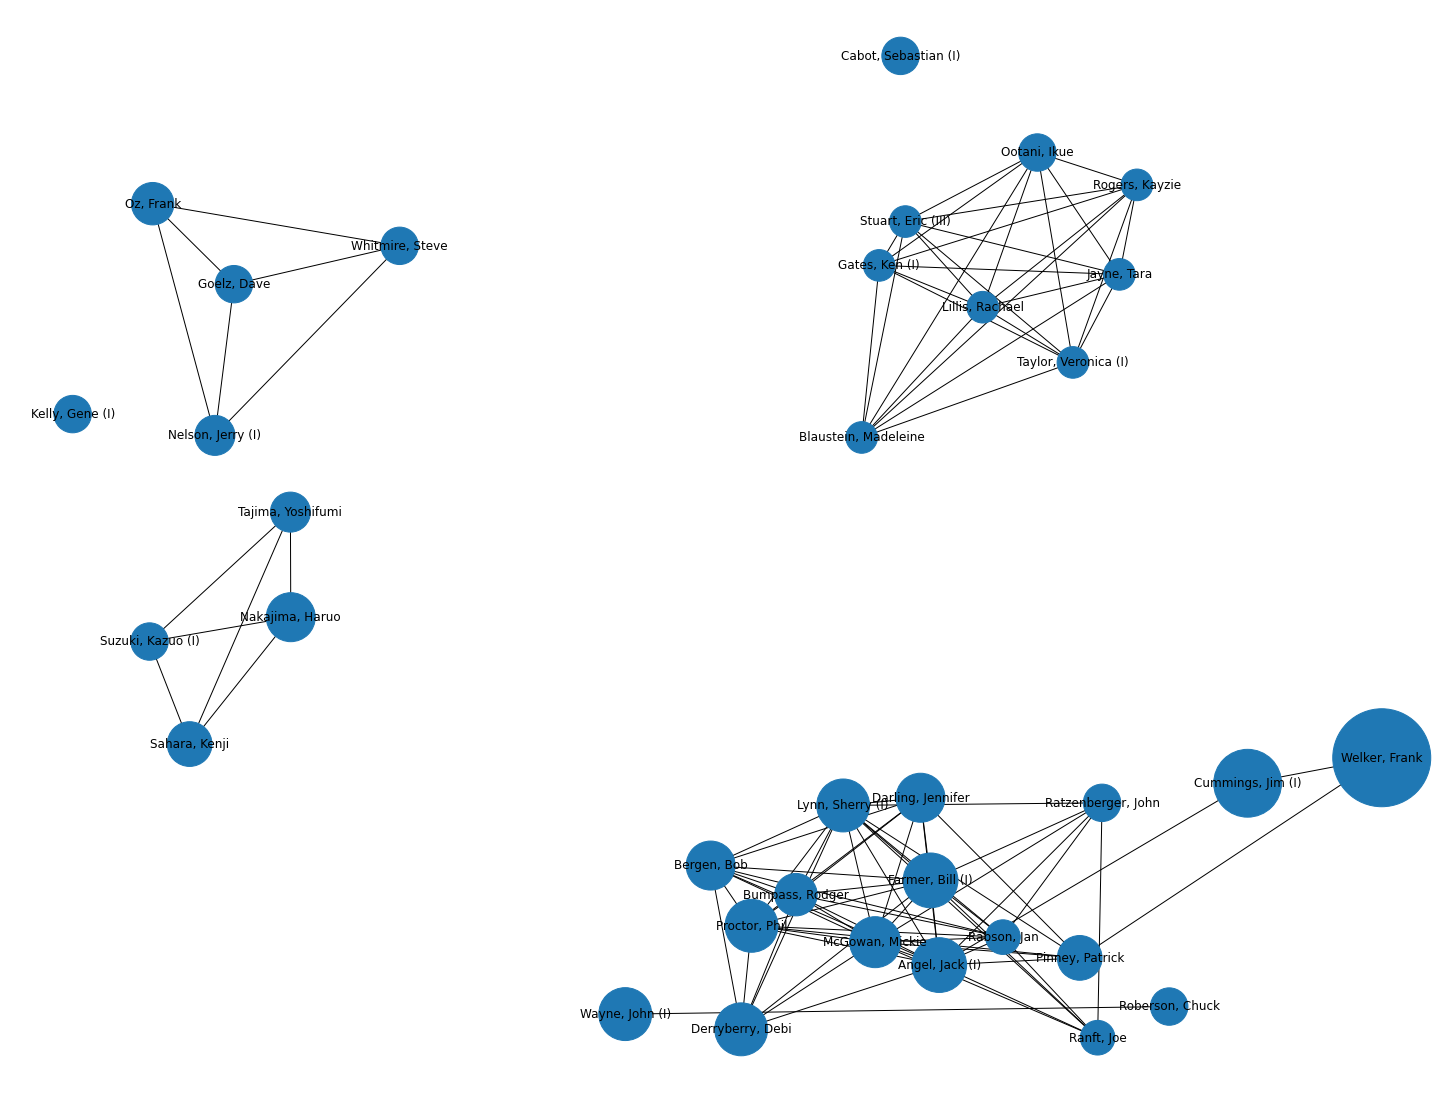

In [17]:
plt.figure(figsize =(20,15)) 
pos = nx.spring_layout(movieGraph, k=0.7, iterations=20)
nx.draw(movieGraph, pos, with_labels = True, node_size = scaled_sizes)

What we're left with, is all the major actors who have significant relationships with each other

In [18]:
print(nx.info(movieGraph))

Name: 
Type: Graph
Number of nodes: 35
Number of edges: 102
Average degree:   5.8286


In [19]:
print(movieGraph.number_of_nodes())

35


In [20]:
print(movieGraph.number_of_edges())

102


In [21]:
print(nx.adjacency_matrix(movieGraph).todense())

[[0 0 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 5 5]
 [0 0 0 ... 5 0 5]
 [0 0 0 ... 5 5 0]]


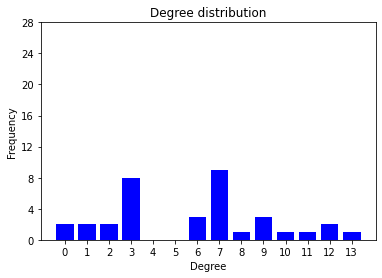

In [22]:
y_axis = nx.degree_histogram(movieGraph)
x_axis = list(range(0, len(y_axis)))
plt.bar(x_axis, y_axis, color = 'blue')

# Create axis labels 
plt.xticks(x_axis)
plt.yticks([0,4,8,12,16,20,24,28])

# Add title and axis names
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
 
plt.show()

In [23]:
cliquesList = list(nx.find_cliques(movieGraph))
for clique in cliquesList:
    if len(clique)>3: 
        print(clique)

['Suzuki, Kazuo (I)', 'Nakajima, Haruo', 'Sahara, Kenji', 'Tajima, Yoshifumi']
['Blaustein, Madeleine', 'Gates, Ken (I)', 'Jayne, Tara', 'Rogers, Kayzie', 'Taylor, Veronica (I)', 'Ootani, Ikue', 'Lillis, Rachael', 'Stuart, Eric (III)']
['Goelz, Dave', 'Whitmire, Steve', 'Oz, Frank', 'Nelson, Jerry (I)']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Bumpass, Rodger', 'Bergen, Bob', 'Proctor, Phil', 'Darling, Jennifer']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Bumpass, Rodger', 'Bergen, Bob', 'Proctor, Phil', 'Derryberry, Debi']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Bumpass, Rodger', 'Bergen, Bob', 'Proctor, Phil', 'Rabson, Jan']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Ratzenberger, John', 'Rabson, Jan', 'Ranft, Joe']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Pinney, Patrick', 'Darling, Jennifer', 'Proctor, Phil']


In [24]:
df = pd.DataFrame(index=movieGraph.nodes())

df['degree'] = pd.Series(dict(movieGraph.degree()))
df['clustering'] =  pd.Series(nx.clustering(movieGraph))
df['degree centrality'] = pd.Series(nx.degree_centrality(movieGraph))
df['closeness centrality'] = pd.Series(nx.closeness_centrality(movieGraph))
df['betweenness centrality'] = pd.Series(nx.betweenness_centrality(movieGraph, normalized=True))

df.head()

,degree,clustering,degree centrality,closeness centrality,betweenness centrality
"Welker, Frank",2,0.0,0.058824,0.174688,0.000891
"Nelson, Jerry (I)",3,1.0,0.088235,0.088235,0.000000
"Oz, Frank",3,1.0,0.088235,0.088235,0.000000
"Whitmire, Steve",3,1.0,0.088235,0.088235,0.000000
"Goelz, Dave",3,1.0,0.088235,0.088235,0.000000


In [25]:
df1 = pd.DataFrame(index=nx.non_edges(movieGraph))

CommNeighbor = {}
JaccardCoef = {}

for edge in nx.non_edges(movieGraph): CommNeighbor[edge[0],edge[1]] = len(list(nx.common_neighbors(movieGraph,edge[0],edge[1])))
for value in list(nx.jaccard_coefficient(movieGraph)): JaccardCoef[value[0],value[1]] = round(value[2],1)

df1['Jaccard Coefficient'] = pd.Series(JaccardCoef)
df1['Common Neighbor'] = pd.Series(CommNeighbor)

sort_df = df1.sort_values(['Common Neighbor','Jaccard Coefficient'],ascending=False)

sort_df[0:10]

,Jaccard Coefficient,Common Neighbor
"(Derryberry, Debi, Darling, Jennifer)",0.9,7
"(Derryberry, Debi, Rabson, Jan)",0.8,7
"(Darling, Jennifer, Rabson, Jan)",0.7,7
"(Bumpass, Rodger, Ratzenberger, John)",0.5,5
"(Bumpass, Rodger, Pinney, Patrick)",0.5,5
"(Bumpass, Rodger, Ranft, Joe)",0.5,5
"(Proctor, Phil, Ratzenberger, John)",0.5,5
"(Proctor, Phil, Ranft, Joe)",0.5,5
"(Ratzenberger, John, Bergen, Bob)",0.5,5
"(Bergen, Bob, Pinney, Patrick)",0.5,5


In [26]:
sort_df1 = df.sort_values(['degree centrality'], ascending = False)
sort_df1['degree centrality'][0:5]

Angel, Jack (I)     0.382353
Lynn, Sherry (I)    0.352941
McGowan, Mickie     0.352941
Farmer, Bill (I)    0.323529
Proctor, Phil       0.294118
Name: degree centrality, dtype: float64

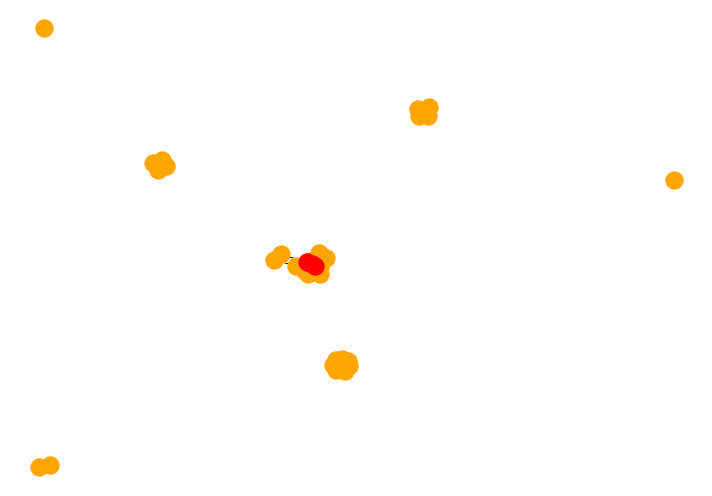

In [27]:
plt.figure(figsize =(10, 7)) 

pos=nx.spring_layout(movieGraph)

nx.draw_networkx(movieGraph, pos, with_labels=False, node_color='orange')
nx.draw_networkx_nodes(movieGraph, pos, nodelist=['Lynn, Sherry (I)','McGowan, Mickie','Angel, Jack (I)'], node_color='red')

plt.axis('off')
plt.tight_layout();

In [28]:
df3 = pd.DataFrame(index=movieGraph.nodes())
df3['betweenness centrality'] = pd.Series(nx.betweenness_centrality(movieGraph))
df3 = df3.sort_values(['betweenness centrality'], ascending = False)
df3[0:5]

,betweenness centrality
"Angel, Jack (I)",0.033325
"Pinney, Patrick",0.018004
"McGowan, Mickie",0.010330
"Lynn, Sherry (I)",0.010330
"Farmer, Bill (I)",0.004686


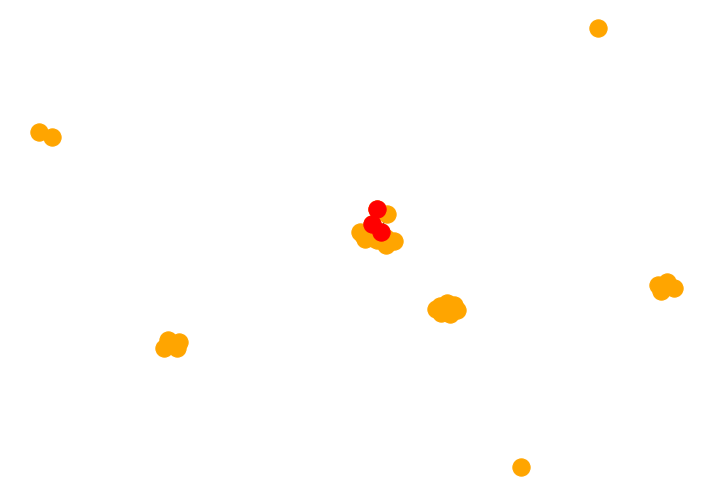

In [29]:
plt.figure(figsize =(10, 7)) 

pos=nx.spring_layout(movieGraph)

nx.draw_networkx(movieGraph, pos, with_labels=False, node_color='orange')
nx.draw_networkx_nodes(movieGraph, pos, nodelist=['Welker, Frank','Pinney, Patrick','Angel, Jack (I)'], node_color='red')

plt.axis('off')
plt.tight_layout();

In [30]:
df4 = pd.DataFrame(index=movieGraph.nodes())
df4['closeness centrality'] = pd.Series(nx.closeness_centrality(movieGraph))
df4 = df4.sort_values(['closeness centrality'], ascending = False)
df4[0:5]

,closeness centrality
"Angel, Jack (I)",0.384314
"Lynn, Sherry (I)",0.360294
"McGowan, Mickie",0.360294
"Farmer, Bill (I)",0.320261
"Proctor, Phil",0.320261


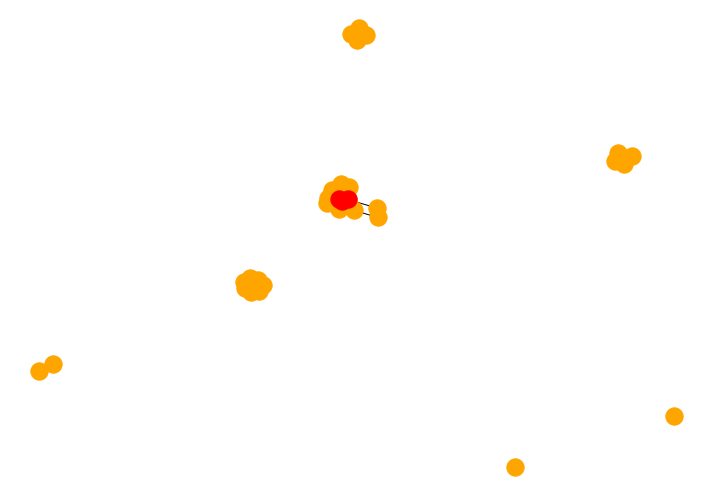

In [31]:
plt.figure(figsize =(10, 7)) 

pos=nx.spring_layout(movieGraph)

nx.draw_networkx(movieGraph, pos, with_labels=False, node_color='orange')
nx.draw_networkx_nodes(movieGraph, pos, nodelist=['McGowan, Mickie','Lynn, Sherry (I)','Angel, Jack (I)'], node_color='red')

plt.axis('off')
plt.tight_layout();

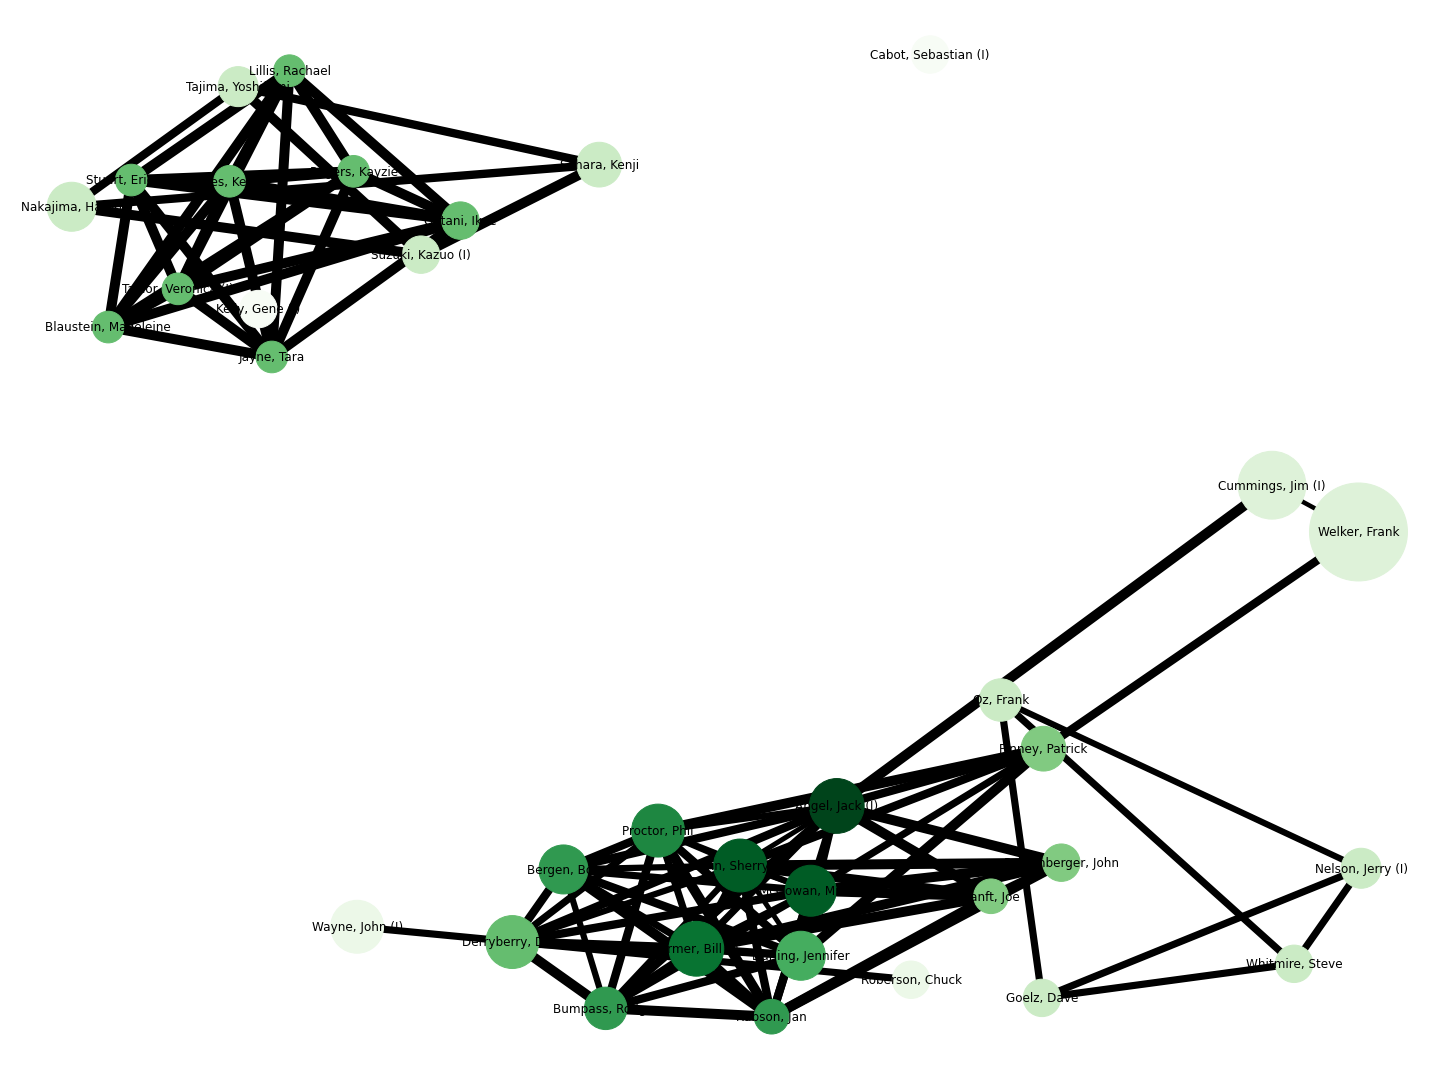

In [32]:
plt.figure(figsize =(20,15)) 
pos = nx.spring_layout(movieGraph, k=0.7, iterations=20)

node_color = [movieGraph.degree(v) for v in movieGraph] 
edge_width = [50 * (1.0/movieGraph[u][v]['weight']) for u, v in movieGraph.edges()] 
nx.draw_networkx(movieGraph, pos,
                 node_color=node_color, with_labels=True, 
                 width=edge_width,
                 cmap=plt.cm.Greens, node_size = scaled_sizes)
plt.axis('off')
plt.tight_layout();

# Findings and Interpretations

I began by implementing methods to create node sizes and weights based on the number of movies actors appeared in and the number of movies actors shared together respectively. I also chose to filter out any edges with weight of less than 5 (actors with less than 5 movies shared in common with another actor, and actors who had less than or equal to 2 connections. This shrunk my graph down to 35 nodes.

The first analysis I did was drawing the graph with weights. By doing so, I was able to find the actors easily who appeared in the most movies. This was Welker, Frank who appeared in 48. The next highest were Cummings, Jim, Debi Derryberry, and a few others. These numbers are determined by the entire file, not just the nodes kept in my graph. I did this so I could determine the most popular actors overall, not just the ones with edges I chose to keep in my graph.

The graph I created had 102 edges and an average degree of 5.8286, meanning nodes had a high number of connections, however my graph ended up being a disconnected graph. This is because there were inevitably actors who did not share any movies together and the graph was much more focused on clusters due to how the movies cast.

Within my graph, I found that the people most likely to become connected were:

This means these actors are most likely to be cast and work on a movie together in the future!

(Derryberry, Debi, Darling, Jennifer)	0.9	7
(Rabson, Jan, Derryberry, Debi)	0.8	7
(Rabson, Jan, Darling, Jennifer)	0.7	7

Based on their Jaccard Coefficient and common actor neighbors. 

In terms of degree centrality, I found that Jack Angel, Sherry Lynn, and Mickie McGowan were the most central to the graph I created. These actors are the most important ones who shared movies with the most other number of nodes.

For betweenness centrality, I foudn that Jack Angel, Patrick Pinney, and Mickie McGowan were the highest. These actors are the ones who share mutual movies with others and make the graph more connected. They have the shortest paths between connecting movies with other actors.

For closenesss centrality, I found that Jack Angel, Sherry Lynn, and Mickie McGowan were the most central in closeness, the same as degree centrality. These actors, similar to degree centrality, are the most important nodes that are close to other nodes. The actors share a lot of movies in common with others, that have a lower distance and are important.

Finally, I found that many of the edges ended up with the same weight as seen in the final graph. This makes sense because of how clustered the graph is with cliques, where actors all share a movie together within the clique. 